# Word2Vec

In [10]:
# Importing libraries
import nltk
import re
from gensim.models import Word2Vec
from nltk.corpus import stopwords

In [11]:
paragraph = "The Business Platinum Card® from American Express is a fantastic business card for businesses that travel often and want to make future trips more luxurious. Beyond the rewards program, there are dozens of perks that can make flying less expensive and hassle-free, such as airline fee credits, lounge access and concierge service. Businesses that don’t travel often may see less value with this card since it has many travel benefits and a rewards program mainly structured around travel. You may want to check out other business cards that offer cash back, high rewards for business purchases like gas, or 0% intro APR periods. The Business Platinum Card® from American Express offers exceptional perks that are second to none. Whether your business wants lounge access at over 500 airports worldwide, easy options for account management, various insurances and hotlines, or entertainment perks, this card has you covered. Additionally, you earn the highest reward rate on eligible travel purchases with this card: 5X Membership Rewards® points on flights and prepaid hotels on amextravel.com and 1.5 Membership Rewards® points per dollar on each eligible purchase of $5,000 or more. The $595 annual fee is one of the highest among competitors. Yes, you get a lot of benefits with this card but some businesses may not see the $595 annual fee as feasible. Fortunately, there are other business cards that don’t have an annual fee or have a lower annual fee. Keep in mind you will forgo many of the exclusive perks of The Business Platinum Card® from American Express by choosing another card. The Business Platinum Card® from American Express offers the most benefits of any business card: Business Platinum Concierge: Representatives are available 24/7 to assist with any questions or requests like booking a business lunch. 35% Airline bonus: When you use Membership Rewards® Pay with Points for eligible fares (like First and Business Class), you can receive 35% of those points back, up to 500,000 bonus points per calendar year. American Express Global Lounge Collection: Travel in comfort with access to 1,000+ airport lounges in over 500 airports around the world. Fee Credit for Global Entry or TSA Pre Every 4 years you can receive a statement credit for Global Entry or TSA Pre to make traveling less of a hassle. $200 Airline fee credit: After choosing one airline, you can receive up to $200 in statement credits for checked bags, in-flight refreshments, and other fees. Fine Hotels & Resorts: Booking with Fine Hotels & Resorts allows you to receive complimentary benefits including: room upgrades when available, breakfast, late check-out and more. Upgrade to gold status in select programs: You can upgrade to Gold Status in the Starwood Preferred Guest® program and Hilton Honors™ program. Boingo American Express Preferred Plan: You can access free, unlimited Wi-Fi with this plan on up to four devices at over 1,000,000 hotspots worldwide. Business Platinum travel service: Counselors are available to assist in making travel arrangements and itineraries to make traveling more efficient. Account Manager: Employees or business partners can act as an Account Manager to deal with reviewing statements, making payments and other tasks. American Express® Business App: Manage your card more easily via mobile or desktop to add receipts and notes to transactions. Connect to QuickBooks: Link your QuickBooks and card account to facilitate expenses by labeling and transferring transactions. Baggage insurance plan: If your luggage is lost, damaged, or stolen, you may be covered for the cost when you pay for your ticket with your card. Travel accident insurance: You may be covered up to $100,000 for accidental death and dismemberment as a result of eligible travel fares including plane, train, ship or bus. Global dining collection: Receive special access to reservations and experiences at popular restaurants, and the opportunity to meet chefs at exclusive events. Premium Global Assist® hotline: When you travel over 100 miles from your business, you can qualify for select referrals and services including medical, legal and financial. You’re responsible for the costs charged by third-party service providers. Premium car rental privileges: At premium car rentals, you can receive complimentary membership that includes special upgrades and discounts. Premium roadside assistance: When you are present with an eligible vehicle, you can access the following services at no additional cost up to 4 times per calendar year: towing up to 10 miles, winching, jump starts, flat tire change when you have a workable spare, lockout service when key is in vehicle and delivery of up to 2 gallons of fuel. Car rental loss and damage insurance: You may be covered for the cost of damage or theft when you pay for the rental with your card. OPEN Savings®: Spending at OPEN Savings merchants can earn you either a 5% discount or 2 additional Membership Rewards® points per eligible dollar spent. Preferred Seating: Receive exclusive access to premium seats for events. Entertainment Access®: In select cities you can gain access to exclusive events and presales for concerts, sporting events, Broadways shows and more. The Business Platinum Card® from American Express earns 5X Membership Rewards® points on flights and prepaid hotels on amextravel.com and 1.5 Membership Rewards® points per dollar on each eligible purchase of $5,000 or more. So, it’s beneficial to book all flights and prepaid hotels at amextravel.com to earn the high rewards rate. Use Membership Rewards® Pay with Points for all or part of an eligible fare so you can get 35% of those points back, up to 500,000 bonus points per calendar year. If you travel frequently for business, consider applying for Global Entry or TSA Pre ™ to expedite airport visits. Be sure to select the airline that your business predominantly uses so you can take advantage of the $200 airline fee credit for things like checked baggage and in-flight refreshments. This card is great to use abroad since there is no foreign transaction fee and will save you the 2% to 5% fee some other cards charge. To earn extra Membership Rewards® Points, meet the requirements of the additional Offer: Earn 75,000 Membership Rewards® points after you spend $15,000 on qualifying purchases within your first 3 months of Card Membership. The Business Platinum Card® from American Express offers 5X Membership Rewards® points on flights and prepaid hotels on amextravel.com and 1.5 Membership Rewards® points per dollar on each eligible purchase of $5,000 or more. Membership Rewards® Points can be redeemed for gift cards, transfers to select frequent travel programs, points for charges, shop with points at Amazon.com and more. See embershiprewards.com/terms for the Membership Rewards program terms and conditions. There is a Welcome Offer: Earn 75,000 Membership Rewards® points after you spend $15,000 on qualifying purchases within your first 3 months of Card Membership. The Business Platinum Card® from American Express is a stand-out business card that offers the most value of any card in its category, making the $595 annual fee worth it for businesses that frequently travel and want to enjoy over two dozen perks."


In [12]:
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [13]:
text

'the business platinum card® from american express is a fantastic business card for businesses that travel often and want to make future trips more luxurious. beyond the rewards program, there are dozens of perks that can make flying less expensive and hassle-free, such as airline fee credits, lounge access and concierge service. businesses that don’t travel often may see less value with this card since it has many travel benefits and a rewards program mainly structured around travel. you may want to check out other business cards that offer cash back, high rewards for business purchases like gas, or % intro apr periods. the business platinum card® from american express offers exceptional perks that are second to none. whether your business wants lounge access at over airports worldwide, easy options for account management, various insurances and hotlines, or entertainment perks, this card has you covered. additionally, you earn the highest reward rate on eligible travel purchases with

In [14]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english') 
                    and re.match('[a-zA-Z]', word)]
sentences[i] = [word for word in sentences[i]if len(word)>3]

In [15]:
count = 0
for i in sentences:
    size = len(i)
    count = count +size
print(count)

700


In [16]:
# Word2Vec modeling
model = Word2Vec(sentences, min_count=2)
words = model.wv.vocab


count = 0
for k in words:
    count += 1
print(count)

120


In [17]:
# Finding Word Vectors
vector = model.wv['business']
vector

array([-4.8119891e-03,  3.4282732e-04, -3.0459366e-03,  1.9777075e-03,
       -9.3847699e-04, -7.9396949e-04,  4.0762457e-03,  3.8512948e-03,
        2.5723083e-03, -3.8814789e-03,  3.1250643e-03, -4.6565030e-03,
       -4.2181704e-03,  3.3425423e-03,  4.1062837e-03, -3.1956586e-03,
       -3.3893643e-03,  3.7395987e-03,  5.5250264e-04, -2.5460741e-03,
       -2.9390731e-03,  4.3880376e-03, -1.6197250e-03,  2.6053572e-03,
       -1.7532685e-03, -2.4327689e-03, -7.8007428e-04, -2.8332768e-03,
       -4.7089779e-03,  1.6492895e-03,  3.8755098e-03,  3.5124039e-03,
        4.8042377e-03, -3.6939972e-03,  3.5315591e-03, -2.7545844e-03,
        1.3859218e-03,  3.4987929e-03,  4.4443347e-03, -1.9663149e-03,
       -3.8080441e-03,  9.8040131e-05, -3.9625820e-03,  4.2164414e-03,
       -1.4590494e-03, -1.5866348e-03, -3.4765601e-03, -2.7761569e-03,
       -2.5786599e-03, -3.3787338e-03,  2.3833847e-05,  2.7999869e-03,
        1.8528024e-03, -2.3634951e-03, -1.2394767e-03, -3.6239275e-04,
      

In [18]:
# Most similar words
similar = model.wv.most_similar('travel')
similar

[('fares', 0.21399666368961334),
 ('preferred', 0.19751206040382385),
 ('hotels', 0.1726837158203125),
 ('eligible', 0.17192932963371277),
 ('platinum', 0.16352775692939758),
 ('airports', 0.15921196341514587),
 ('prepaid', 0.15648362040519714),
 ('premium', 0.1557311862707138),
 ('refreshments', 0.15052887797355652),
 ('back', 0.14960721135139465)]

In [39]:
model.wv.evaluate_word_analogies(text)

KeyError: 'business'

In [32]:
model.wv['platinum'] - model.wv['travel'] + model.wv['rewards']

array([ 2.7941123e-03,  5.0690444e-03,  4.8121414e-03,  3.4245714e-03,
        3.8519024e-03,  2.6820041e-04, -5.4583303e-03, -5.4846783e-03,
       -4.3568937e-03, -8.2459794e-03,  5.4514420e-04,  2.3244543e-03,
        2.8599650e-03, -3.7302843e-03,  1.0091276e-03,  4.2612860e-03,
        8.8222674e-04, -3.4413086e-03,  3.3708985e-03,  2.2412315e-03,
        1.5156077e-03,  7.9846708e-03, -3.7823035e-04,  1.0971286e-03,
        1.0974007e-02,  6.4472691e-03, -2.9384233e-03,  5.3926732e-04,
        1.7761318e-03, -5.7659857e-04, -1.9483729e-03, -1.4224622e-03,
        3.0364599e-03, -3.0367747e-03,  4.9385368e-03,  2.6651325e-03,
       -4.3615270e-03, -4.0829536e-03, -2.7931319e-03,  4.4044829e-04,
        5.0020488e-03, -1.4705316e-04,  4.9786814e-03,  5.5446178e-03,
       -3.2895990e-04,  2.7483113e-03, -9.9915243e-04,  7.7142911e-03,
        5.0244108e-04, -7.5004995e-04,  1.0017814e-02, -1.0044699e-03,
        8.1560044e-03,  5.9377141e-03,  1.1259447e-03,  3.4719822e-03,
      

## Principal component analysis (PCA)

In [19]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

C:\Users\deepa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


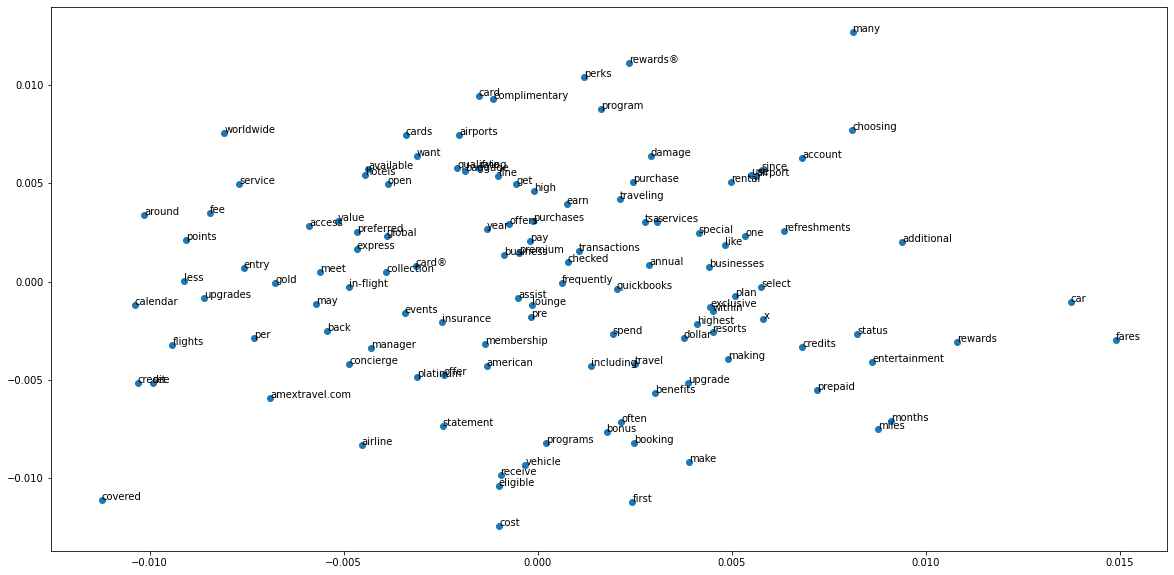

In [22]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.figure(figsize=(20,10))
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)

for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [35]:
 model.most_similar(positive=['platinum', 'rewards'], negative=['travel'])


C:\Users\deepa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('within', 0.1972886323928833),
 ('receive', 0.1930810660123825),
 ('miles', 0.18849501013755798),
 ('making', 0.18626034259796143),
 ('available', 0.16397643089294434),
 ('additional', 0.15559369325637817),
 ('cost', 0.14039093255996704),
 ('fine', 0.13885731995105743),
 ('select', 0.1366472840309143),
 ('services', 0.12862426042556763)]